# Machine Learning

**Health Insurance Marketplace** 

In this part I will try to predict Individual Rates using regression models and will comapare results and performance of these models. We have researched the data on all the state of US. 
As the data is huge, so to avoid getting into memory run out issues I will concentrate on Florida's premium. As per my analyisis Florida has the maximum number of Plans therefore I have opted for this state

In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = None
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
from pylab import rcParams

In [2]:
rate = pd.read_csv('rate_FL.csv')
planattribute =  pd.read_csv('plan_att_FL.csv')
bcs = pd.read_csv('bcs_FL.csv')

In [3]:
bcs.reset_index(inplace=True)
planattribute.reset_index(inplace=True)
rate.reset_index(inplace=True)

In [4]:
bcs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585724 entries, 0 to 585723
Data columns (total 20 columns):
index                  585724 non-null int64
BusinessYear           585724 non-null int64
StateCode              585724 non-null object
IssuerId               585724 non-null int64
StandardComponentId    585724 non-null object
PlanId                 585724 non-null object
BenefitName            585724 non-null object
IsEHB                  585724 non-null object
IsCovered              585724 non-null object
QuantLimitOnSvc        585724 non-null object
EHBVarReason           585724 non-null object
CopayInnTier1Value     585724 non-null float64
CopayInnTier1Unit      585724 non-null object
CopayInnTier2Value     585724 non-null float64
CopayInnTier2Unit      585724 non-null object
CopayOutofNetValue     585724 non-null float64
CopayOutofNetUnit      585724 non-null object
CoinsInnTier1Value     585724 non-null float64
CoinsInnTier2Value     585724 non-null float64
CoinsOutofNet

In [5]:
planattribute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8320 entries, 0 to 8319
Data columns (total 8 columns):
index                         8320 non-null int64
BusinessYear                  8320 non-null int64
StateCode                     8320 non-null object
PlanId                        8320 non-null object
MetalLevel                    8320 non-null object
TEHBInnTier1IndividualMOOP    8320 non-null float64
TEHBInnTier2IndividualMOOP    8320 non-null float64
TEHBOutOfNetIndividualMOOP    8320 non-null float64
dtypes: float64(3), int64(2), object(3)
memory usage: 520.1+ KB


In [6]:
rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2737653 entries, 0 to 2737652
Data columns (total 19 columns):
index                                        int64
BusinessYear                                 int64
StateCode                                    object
IssuerId                                     int64
RateEffectiveDate                            object
RateExpirationDate                           object
PlanId                                       object
RatingAreaId                                 object
Tobacco                                      object
Age                                          object
IndividualRate                               float64
IndividualTobaccoRate                        float64
Couple                                       float64
PrimarySubscriberAndOneDependent             float64
PrimarySubscriberAndTwoDependents            float64
PrimarySubscriberAndThreeOrMoreDependents    float64
CoupleAndOneDependent                        float64

In [7]:
planattribute['PlanId'] = planattribute['PlanId'].str.split('-').str[0]

In [8]:
#Now merge the plan attributes dataset with the rate benefit dataset
rate_plan = pd.merge(rate,planattribute, on=['BusinessYear','StateCode','PlanId'], how = 'left',indicator=True)

In [9]:
rate_plan.reset_index(inplace=True)
rate_plan.drop(['index','_merge','index_x','index_y'],axis=1,inplace=True)

In [10]:
rate_plan.head()

,BusinessYear,StateCode,IssuerId,RateEffectiveDate,RateExpirationDate,PlanId,RatingAreaId,Tobacco,Age,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,MetalLevel,TEHBInnTier1IndividualMOOP,TEHBInnTier2IndividualMOOP,TEHBOutOfNetIndividualMOOP
0,2014,FL,15833,2014-01-01,2014-12-31,15833FL0020001,Rating Area 1,No Preference,0-20,22.38,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Low,0.0,0.0,0.0
1,2014,FL,15833,2014-01-01,2014-12-31,15833FL0020001,Rating Area 1,No Preference,0-20,22.38,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Low,0.0,0.0,0.0
2,2014,FL,15833,2014-01-01,2014-12-31,15833FL0030001,Rating Area 1,No Preference,Family Option,21.98,0.0,44.00,47.38,72.77,110.87,69.40,94.79,132.89,High,0.0,0.0,0.0
3,2014,FL,15833,2014-01-01,2014-12-31,15833FL0030001,Rating Area 1,No Preference,Family Option,21.98,0.0,44.00,47.38,72.77,110.87,69.40,94.79,132.89,High,0.0,0.0,0.0
4,2014,FL,15833,2014-01-01,2014-12-31,15833FL0030001,Rating Area 2,No Preference,Family Option,22.29,0.0,44.63,48.00,73.71,112.28,70.34,96.05,134.62,High,0.0,0.0,0.0


In [11]:
rate_plan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7201634 entries, 0 to 7201633
Data columns (total 22 columns):
BusinessYear                                 int64
StateCode                                    object
IssuerId                                     int64
RateEffectiveDate                            object
RateExpirationDate                           object
PlanId                                       object
RatingAreaId                                 object
Tobacco                                      object
Age                                          object
IndividualRate                               float64
IndividualTobaccoRate                        float64
Couple                                       float64
PrimarySubscriberAndOneDependent             float64
PrimarySubscriberAndTwoDependents            float64
PrimarySubscriberAndThreeOrMoreDependents    float64
CoupleAndOneDependent                        float64
CoupleAndTwoDependents                       float

In [12]:
rate_plan.isna().sum()
#Tobacco column has few NAs which is very few as respect to the overall records we have. So we can delete those records. 

BusinessYear                                   0
StateCode                                      0
IssuerId                                       0
RateEffectiveDate                              0
RateExpirationDate                             0
PlanId                                         0
RatingAreaId                                   0
Tobacco                                      108
Age                                            0
IndividualRate                                 0
IndividualTobaccoRate                          0
Couple                                         0
PrimarySubscriberAndOneDependent               0
PrimarySubscriberAndTwoDependents              0
PrimarySubscriberAndThreeOrMoreDependents      0
CoupleAndOneDependent                          0
CoupleAndTwoDependents                         0
CoupleAndThreeOrMoreDependents                 0
MetalLevel                                     0
TEHBInnTier1IndividualMOOP                     0
TEHBInnTier2Individu

In [13]:
rate_plan.dropna(inplace=True)
rate_plan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7201526 entries, 0 to 7201633
Data columns (total 22 columns):
BusinessYear                                 int64
StateCode                                    object
IssuerId                                     int64
RateEffectiveDate                            object
RateExpirationDate                           object
PlanId                                       object
RatingAreaId                                 object
Tobacco                                      object
Age                                          object
IndividualRate                               float64
IndividualTobaccoRate                        float64
Couple                                       float64
PrimarySubscriberAndOneDependent             float64
PrimarySubscriberAndTwoDependents            float64
PrimarySubscriberAndThreeOrMoreDependents    float64
CoupleAndOneDependent                        float64
CoupleAndTwoDependents                       float

In [14]:
#Convert the dates to proper format and take the duration of the plan by taking difference 
#of the Expiration date and effective date
import datetime
effdate = pd.to_datetime(rate_plan['RateEffectiveDate'], format='%Y-%m-%d').dt.date
expdate = pd.to_datetime(rate_plan['RateExpirationDate'], format='%Y-%m-%d').dt.date
duration = expdate - effdate
rate_plan.drop(['RateEffectiveDate','RateExpirationDate'],inplace=True,axis=1)
rate_plan['Duration'] = duration.astype('str').str.split(' ').str[0]


In [15]:
#Checking the type of Metal Level in our dataset
rate_plan.MetalLevel.unique()

array(['Low', 'High', 'Gold', 'Silver', 'Bronze', 'Platinum',
       'Catastrophic', 'Expanded Bronze'], dtype=object)

In [16]:
#MetalLevel as Low and High are of Dental. As we are doing the analysis for Medical benefits, so we should delete those records
rate_plan = rate_plan[(rate_plan['MetalLevel'] != 'Low') & (rate_plan['MetalLevel'] != 'High')]
rate_plan.MetalLevel.unique()

array(['Gold', 'Silver', 'Bronze', 'Platinum', 'Catastrophic',
       'Expanded Bronze'], dtype=object)

In [17]:
rate_plan['MetalLevel'] = rate_plan['MetalLevel'].astype('category')

In [18]:
#In 2017 the Age bucket for the kids was changed from 0-20 to 0-14 so therefore we have some discrepancy in that Age group
#Also, the age for senior citizen was reduced to 4 age.
#For simplicity, I am keeping all the age group from 0-20 in 0-20 group only
rate_plan.Age.unique()

array(['0-20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30',
       '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41',
       '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52',
       '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63',
       '64', '65 and over', '0-14', '15', '16', '17', '18', '19', '20',
       '64 and over'], dtype=object)

In [19]:
rate_plan['Age'].replace('0-14', '0-20',inplace = True)
rate_plan['Age'].replace('0-15', '0-20',inplace = True)
rate_plan['Age'].replace('16', '0-20',inplace = True)
rate_plan['Age'].replace('17', '0-20',inplace = True)
rate_plan['Age'].replace('18', '0-20',inplace = True)
rate_plan['Age'].replace('19', '0-20',inplace = True)
rate_plan['Age'].replace('20', '0-20',inplace = True)
rate_plan['Age'].replace('0-20', '20',inplace = True)
rate_plan['Age'].replace('64 and over', '65',inplace = True)
rate_plan['Age'].replace('65 and over', '65',inplace = True)
rate_plan.Age.unique()

array(['20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30',
       '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41',
       '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52',
       '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63',
       '64', '65', '15'], dtype=object)

In [20]:
rate_plan['Age'] = rate_plan['Age'].astype('category')

In [21]:
rate_plan['RatingAreaId'] = rate_plan['RatingAreaId'].str.split(' ').str[2]
rate_plan['RatingAreaId'].unique()

array(['32', '66', '1', '33', '2', '34', '3', '35', '5', '4', '36', '6',
       '37', '8', '38', '9', '7', '39', '10', '40', '11', '41', '15',
       '42', '16', '43', '12', '22', '44', '13', '26', '45', '14', '27',
       '46', '28', '47', '30', '48', '17', '49', '18', '50', '19', '51',
       '20', '52', '21', '53', '54', '23', '55', '24', '56', '25', '57',
       '58', '59', '60', '29', '61', '62', '31', '63', '64', '65', '67'],
      dtype=object)

In [22]:
rate_plan['RatingAreaId'] = rate_plan['RatingAreaId'].astype('category')

In [23]:
rate_plan['Tobacco'].unique() 

array(['Tobacco User/Non-Tobacco User', 'No Preference'], dtype=object)

In [24]:
rate_plan['Tobacco'] = rate_plan['Tobacco'].astype('category')

In [25]:
#We can see the difference in the space utilization of the current dataset. Earlier the dataset was 5GB but now its half of it.
#This is how helpful it is to make the data Categorical
rate_plan.reset_index(inplace=True)
rate_plan.drop(['index'],inplace=True,axis=1)
rate_plan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5155187 entries, 0 to 5155186
Data columns (total 21 columns):
BusinessYear                                 int64
StateCode                                    object
IssuerId                                     int64
PlanId                                       object
RatingAreaId                                 category
Tobacco                                      category
Age                                          category
IndividualRate                               float64
IndividualTobaccoRate                        float64
Couple                                       float64
PrimarySubscriberAndOneDependent             float64
PrimarySubscriberAndTwoDependents            float64
PrimarySubscriberAndThreeOrMoreDependents    float64
CoupleAndOneDependent                        float64
CoupleAndTwoDependents                       float64
CoupleAndThreeOrMoreDependents               float64
MetalLevel                                

In [26]:
bcs['PlanId1'] = bcs['PlanId']
bcs['PlanId'] = bcs['StandardComponentId']
bcs['StandardComponentId'] = bcs['PlanId1']
bcs.drop('PlanId1',axis=1,inplace=True)

In [27]:
bcs_plan = pd.merge(bcs,planattribute, on=['BusinessYear','PlanId','StateCode'], how = 'left',indicator=True)
bcs_plan = bcs_plan[(bcs_plan['MetalLevel'] != 'Low') & (bcs_plan['MetalLevel'] != 'High')]
drop_columns = ['StateCode','MetalLevel','TEHBInnTier1IndividualMOOP',
                'TEHBInnTier2IndividualMOOP','TEHBOutOfNetIndividualMOOP','_merge','index_x','index_y']
bcs_plan.drop(drop_columns,axis=1,inplace=True)
bcs_plan.reset_index(inplace=True)
bcs_plan.drop(['index'],inplace=True,axis=1)
bcs_plan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2735033 entries, 0 to 2735032
Data columns (total 18 columns):
BusinessYear           int64
IssuerId               int64
StandardComponentId    object
PlanId                 object
BenefitName            object
IsEHB                  object
IsCovered              object
QuantLimitOnSvc        object
EHBVarReason           object
CopayInnTier1Value     float64
CopayInnTier1Unit      object
CopayInnTier2Value     float64
CopayInnTier2Unit      object
CopayOutofNetValue     float64
CopayOutofNetUnit      object
CoinsInnTier1Value     float64
CoinsInnTier2Value     float64
CoinsOutofNetValue     float64
dtypes: float64(6), int64(2), object(10)
memory usage: 375.6+ MB


In [28]:
#Sort both the plans with common columns
rate_plan = rate_plan.sort_values(by=['BusinessYear','PlanId','IssuerId'], axis=0, ascending=True, kind='quicksort', na_position='last')
bcs_plan = bcs_plan.sort_values(by=['BusinessYear','PlanId','IssuerId'], axis=0, ascending=True, kind='quicksort', na_position='last')

In [30]:
#Benefits and rate can be combined together. These files are huge and combining them will take too much of resources 
#and merge will go out of memory. So to tackle it I have summarized the Benefits details so that 1 to many relationship
#can be used in combining them.
group= bcs_plan.groupby(['BusinessYear', 'PlanId','IssuerId'])
benefit1 = group['BenefitName'].count()
benefit2 = group['IsEHB'].apply(lambda x: x.value_counts().index[0])
benefit3 = group['IsCovered'].apply(lambda x: x.value_counts().index[0])
benefit4 = group['QuantLimitOnSvc'].apply(lambda x: x.value_counts().index[0])
benefitssum = pd.concat([benefit1,benefit2,benefit3,benefit4],axis=1)
benefitssum.reset_index(inplace=True)
del(benefit1,benefit2,benefit3,benefit4)
benefitssum.info()
#['BenefitName'].count().to_frame().reset_index()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1996 entries, 0 to 1995
Data columns (total 7 columns):
BusinessYear       1996 non-null int64
PlanId             1996 non-null object
IssuerId           1996 non-null int64
BenefitName        1996 non-null int64
IsEHB              1996 non-null object
IsCovered          1996 non-null object
QuantLimitOnSvc    1996 non-null object
dtypes: int64(3), object(4)
memory usage: 109.2+ KB


In [31]:
rate_plan_bcs = pd.merge(rate_plan,benefitssum, on=['BusinessYear','PlanId','IssuerId'], how = 'left',indicator=True)

In [32]:
rate_plan_bcs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5155187 entries, 0 to 5155186
Data columns (total 26 columns):
BusinessYear                                 int64
StateCode                                    object
IssuerId                                     int64
PlanId                                       object
RatingAreaId                                 category
Tobacco                                      category
Age                                          category
IndividualRate                               float64
IndividualTobaccoRate                        float64
Couple                                       float64
PrimarySubscriberAndOneDependent             float64
PrimarySubscriberAndTwoDependents            float64
PrimarySubscriberAndThreeOrMoreDependents    float64
CoupleAndOneDependent                        float64
CoupleAndTwoDependents                       float64
CoupleAndThreeOrMoreDependents               float64
MetalLevel                                

In [33]:
# Create dataframe with the columns which will be required for this Regression Analysis: ml_rates
rates_ml = rate_plan_bcs[['Age','BusinessYear','IndividualRate','IndividualTobaccoRate',
                 'RatingAreaId','Tobacco','Duration','MetalLevel','TEHBInnTier1IndividualMOOP','TEHBOutOfNetIndividualMOOP'
                    ,'IsEHB','BenefitName']]
rates_ml.head() # just to make sure we have all the required columns

,Age,BusinessYear,IndividualRate,IndividualTobaccoRate,RatingAreaId,Tobacco,Duration,MetalLevel,TEHBInnTier1IndividualMOOP,TEHBOutOfNetIndividualMOOP,IsEHB,BenefitName
0,20,2014,172.27,0.0,1,No Preference,89,Silver,6000.0,12000.0,Yes,75
1,20,2014,176.63,0.0,1,No Preference,90,Silver,6000.0,12000.0,Yes,75
2,20,2014,181.09,0.0,1,No Preference,91,Silver,6000.0,12000.0,Yes,75
3,20,2014,185.67,0.0,1,No Preference,91,Silver,6000.0,12000.0,Yes,75
4,21,2014,292.39,0.0,1,No Preference,91,Silver,6000.0,12000.0,Yes,75


**We have all the cleaned data for prediction**

**We will be predicting Individual rate and IndividualTobacco rate and CoupleRate seaprately**


In [34]:
rates_ml[['IndividualRate','IndividualTobaccoRate']].describe()

,IndividualRate,IndividualTobaccoRate
count,5.155187e+06,5.155187e+06
mean,5.374643e+02,5.635067e+02
std,2.893101e+02,3.952735e+02
min,5.199000e+01,0.000000e+00
25%,3.326900e+02,3.297100e+02
50%,4.536100e+02,4.805700e+02
75%,6.716500e+02,7.539400e+02
max,3.072060e+03,3.686490e+03


In [35]:
#Lets check how these rates changes over the year 
meanrateperyear = rates_ml[['BusinessYear','IndividualRate','IndividualTobaccoRate']].groupby('BusinessYear').mean()
meanrateperyear

,IndividualRate,IndividualTobaccoRate
BusinessYear,,
2014,424.254497,465.777226
2015,480.328384,446.307460
2016,489.392785,509.288960
2017,559.321436,554.570253
2018,676.881823,735.876146
2019,716.075636,826.059768


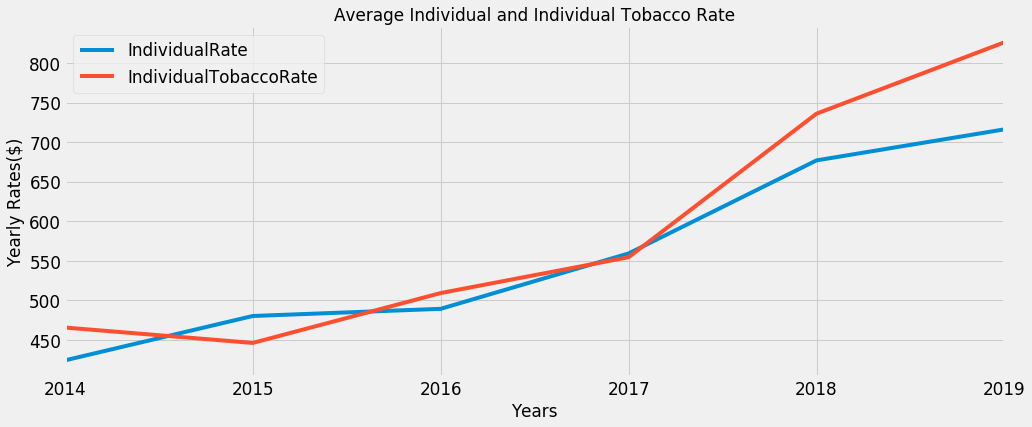

In [36]:
# Plot the above dataframe
meanrateperyear.plot(figsize=(15, 6), fontsize="large")
plt.title('Average Individual and Individual Tobacco Rate', fontsize="large")
plt.xlabel("Years", fontsize="large")
plt.ylabel("Yearly Rates($)", fontsize="large")
plt.legend(fontsize="large")
plt.show()

We can see above that the individual rates has been increasing since its inception but. The increase in rate is also getting bigger every year. But the same is not true for the Individual Tobacco Rate. The second year of exchange saw a fall in individual tobacco rate but again started increasing every year and last year the incease in rate is very large.

**Lets start with individual monthly rate prediction.**

As the rate will be decided on whether a person smokes or not. If somebody smokes then individual has to fetch more money. So lets add the premiums as individual has to pay more if he smokes.  
We will create two dataframes one for the target variables (IndividualRatetotal and other for dependent variables only. In this case depended variables are Age','BusinessYear','IndividualRate','IndividualTobaccoRate',               'RatingAreaId','StateCode','Tobacco','Duration','StateCode','MetalLevel','TEHBInnTier1IndividualMOOP','TEHBOutOfNetIndividualMOOP']].

In [37]:
# first check for the nan values if any in the dataframe.
rates_ml.isnull().any(axis=0)

Age                           False
BusinessYear                  False
IndividualRate                False
IndividualTobaccoRate         False
RatingAreaId                  False
Tobacco                       False
Duration                      False
MetalLevel                    False
TEHBInnTier1IndividualMOOP    False
TEHBOutOfNetIndividualMOOP    False
IsEHB                         False
BenefitName                   False
dtype: bool

In [38]:
rates_ml['IndividualRateTotal'] = rates_ml['IndividualRate'] + rates_ml['IndividualTobaccoRate']
rates_ml['IndividualRateTotallog'] = np.log(rates_ml['IndividualRateTotal'])
rates_ml.drop(['IndividualRate','IndividualTobaccoRate',],axis=1,inplace=True)

C:\Users\Ashish\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Ashish\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Ashish\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documenta

In [ ]:
# Plot the scores over the parameter
plt.subplots(1, 2, figsize=(15, 6))
plt.subplot(121)
plt.(rates_ml['IndividualRateTotal'], 'bo-', label = 'train')
plt.legend()
plt.xlabel(name)
plt.ylabel('R2')
plt.title('Score vs %s' % name)
    
    plt.subplot(122)
    plt.plot(param_values, train_time, 'ro-')
    plt.xlabel(name)
    plt.ylabel('Train Time (sec)')
    plt.title('Training Time vs %s' % name)   
    plt.tight_layout(pad = 4)

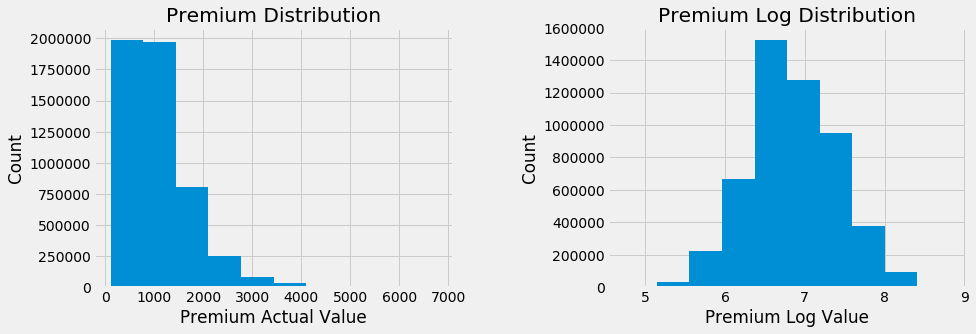

In [43]:
#Plotting the histogram for premiums
#rcParams['figure.figsize'] = 10, 6
rcParams['font.size'] = 20
rcParams['axes.facecolor'] = 'white'
plt.style.use('fivethirtyeight')

plt.subplots(1, 2, figsize=(15, 6))
plt.subplot(121)
plt.hist(rates_ml['IndividualRateTotal'])
plt.xlabel('Premium Actual Value')
plt.ylabel('Count')
plt.title('Premium Distribution')

plt.subplot(122)
plt.hist(rates_ml['IndividualRateTotallog'])
plt.xlabel('name')
plt.xlabel('Premium Log Value')
plt.ylabel('Count')
plt.title('Premium Log Distribution')
plt.tight_layout(pad = 4)
plt.show()

plt.show()
# It can be seen that individual rate is rigth skewed. So to make it normal we have to take a log of it.

**As most of the data is catgorical in the dataset so we need to do one hotEncoding of the data to make it use in the Regression analysis**

# Regression Analysis

Data for the years 2014 to 2018 will be taken as Train data and the data for 2019 will be taken as Test data.
Let's divide the predictors into the same and also the premiums. 

In [44]:
rates_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5155187 entries, 0 to 5155186
Data columns (total 12 columns):
Age                           category
BusinessYear                  int64
RatingAreaId                  category
Tobacco                       category
Duration                      object
MetalLevel                    category
TEHBInnTier1IndividualMOOP    float64
TEHBOutOfNetIndividualMOOP    float64
IsEHB                         object
BenefitName                   int64
IndividualRateTotal           float64
IndividualRateTotallog        float64
dtypes: category(4), float64(4), int64(2), object(2)
memory usage: 373.6+ MB


In [56]:
rates_ml['BusinessYear'] = rates_ml['BusinessYear'].astype('int32')
rates_ml['Tobacco'] = rates_ml['Tobacco'].astype('category')
rates_ml['Duration'] = rates_ml['Duration'].astype('int32')
rates_ml['MetalLevel'] = rates_ml['MetalLevel'].astype('category')
rates_ml['RatingAreaId'] = rates_ml['RatingAreaId'].astype('int32')
rates_ml['IsEHB'] = rates_ml['IsEHB'].astype('category')
rates_ml['BenefitName'] = rates_ml['BenefitName'].astype('int32')
rates_ml['Age'] = rates_ml['Age'].astype('int32')

C:\Users\Ashish\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Ashish\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Ashish\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [48]:
rates_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5155187 entries, 0 to 5155186
Data columns (total 12 columns):
Age                           category
BusinessYear                  int32
RatingAreaId                  category
Tobacco                       category
Duration                      int32
MetalLevel                    category
TEHBInnTier1IndividualMOOP    float64
TEHBOutOfNetIndividualMOOP    float64
IsEHB                         category
BenefitName                   int32
IndividualRateTotal           float64
IndividualRateTotallog        float64
dtypes: category(5), float64(4), int32(3)
memory usage: 280.2 MB


In [57]:
rates_ml_train_pred = rates_ml[rates_ml['BusinessYear'] < 2019].iloc[:,:-2]
rates_ml_test_pred  = rates_ml[rates_ml['BusinessYear'] == 2019].iloc[:,:-2]
rates_ml_train_target = rates_ml[rates_ml['BusinessYear'] < 2019].iloc[:,-1:]
rates_ml_test_target  = rates_ml[rates_ml['BusinessYear'] == 2019].iloc[:,-1:]

In [58]:
rates_ml_train_pred_dummies = pd.get_dummies(rates_ml_train_pred)
rates_ml_test_pred_dummies = pd.get_dummies(rates_ml_test_pred)

In [59]:
rates_ml_train_pred_dummies.head()

,Age,BusinessYear,RatingAreaId,Duration,TEHBInnTier1IndividualMOOP,TEHBOutOfNetIndividualMOOP,BenefitName,Tobacco_No Preference,Tobacco_Tobacco User/Non-Tobacco User,MetalLevel_Bronze,MetalLevel_Catastrophic,MetalLevel_Expanded Bronze,MetalLevel_Gold,MetalLevel_Platinum,MetalLevel_Silver,IsEHB_No,IsEHB_Yes
0,20,2014,1,89,6000.0,12000.0,75,1,0,0,0,0,0,0,1,0,1
1,20,2014,1,90,6000.0,12000.0,75,1,0,0,0,0,0,0,1,0,1
2,20,2014,1,91,6000.0,12000.0,75,1,0,0,0,0,0,0,1,0,1
3,20,2014,1,91,6000.0,12000.0,75,1,0,0,0,0,0,0,1,0,1
4,21,2014,1,91,6000.0,12000.0,75,1,0,0,0,0,0,0,1,0,1


In [60]:
rates_ml_test_pred_dummies.head()

,Age,BusinessYear,RatingAreaId,Duration,TEHBInnTier1IndividualMOOP,TEHBOutOfNetIndividualMOOP,BenefitName,Tobacco_No Preference,Tobacco_Tobacco User/Non-Tobacco User,MetalLevel_Bronze,MetalLevel_Catastrophic,MetalLevel_Expanded Bronze,MetalLevel_Gold,MetalLevel_Platinum,MetalLevel_Silver,IsEHB_No,IsEHB_Yes
4531151,20,2019,1,364,7150.0,14300.0,3626,0,1,0,0,0,0,0,1,0,1
4531152,20,2019,1,364,7150.0,14300.0,3626,0,1,0,0,0,0,0,1,0,1
4531153,20,2019,1,364,0.0,0.0,3626,0,1,0,0,0,0,0,1,0,1
4531154,20,2019,1,364,7150.0,14300.0,3626,0,1,0,0,0,0,0,1,0,1
4531155,20,2019,1,364,6300.0,14300.0,3626,0,1,0,0,0,0,0,1,0,1


# OLS
**Ordinary Least Square(OLS) method: For Individual Rate**

In [53]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import OLS

In [61]:
# initiate and fit the ols model: m
m = sm.OLS(rates_ml_train_target['IndividualRateTotallog'], rates_ml_train_pred_dummies).fit()

# predict using model m for the train data
prediction = m.predict(rates_ml_train_pred_dummies)

# print summary.
print(m.summary())

                              OLS Regression Results                              
Dep. Variable:     IndividualRateTotallog   R-squared:                       0.848
Model:                                OLS   Adj. R-squared:                  0.848
Method:                     Least Squares   F-statistic:                 1.812e+06
Date:                    Wed, 27 Feb 2019   Prob (F-statistic):               0.00
Time:                            22:17:00   Log-Likelihood:             6.8201e+05
No. Observations:                 4531151   AIC:                        -1.364e+06
Df Residuals:                     4531136   BIC:                        -1.364e+06
Df Model:                              14                                         
Covariance Type:                nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

In [62]:
# calculating the residuals
residual = rates_ml_train_target['IndividualRateTotallog'] - prediction

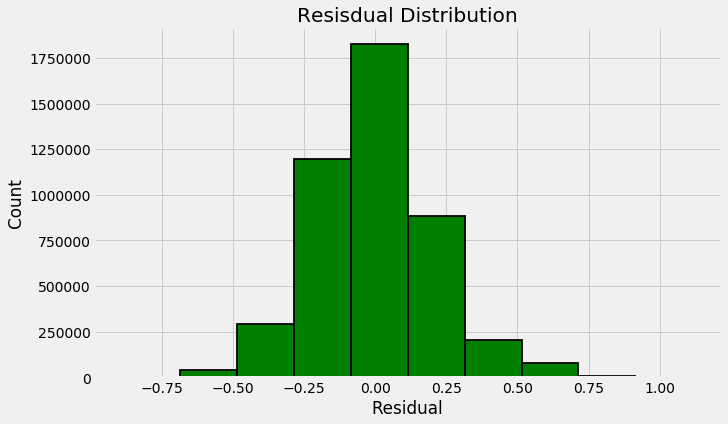

In [63]:
#Plotting the Residual Distribution
plt.hist(residual,color = 'g', edgecolor = 'k', linewidth = 1.8)
plt.xlabel('Residual')
plt.ylabel('Count')
plt.title('Resisdual Distribution')
plt.show()

## Quantile plot:

In statistics, a Q–Q (quantile-quantile) plot is a probability plot, which is a graphical method for comparing two probability distributions by plotting their quantiles against each other. The above two plots suggests that the residual distribution is normal but with some outliers

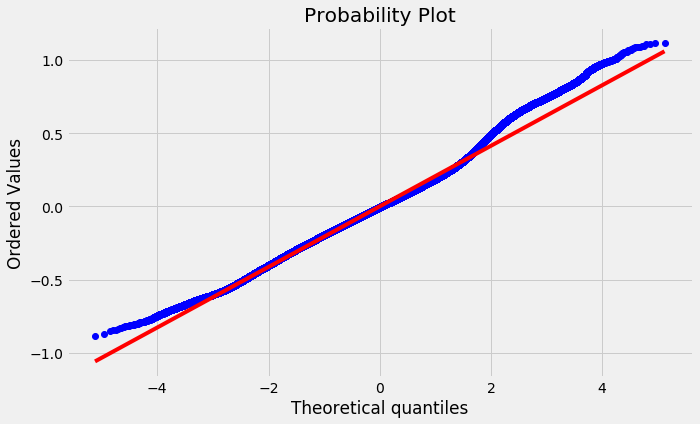

In [64]:
import scipy.stats as stats
stats.probplot(residual, plot=plt)
plt.show()
#There does not appear to be any outliers in the residuals

## Fitted Vs Residual plot 

It is used to detect non-linearity, unequal error variances, and outliers. Since the most of the data are near 0 on y axis the residual looks linear. There are no pattern which means that errors are normaly distributed. Looks like there are outliers. Hence we do not detect any voilations of the model assumption but there are outliers.

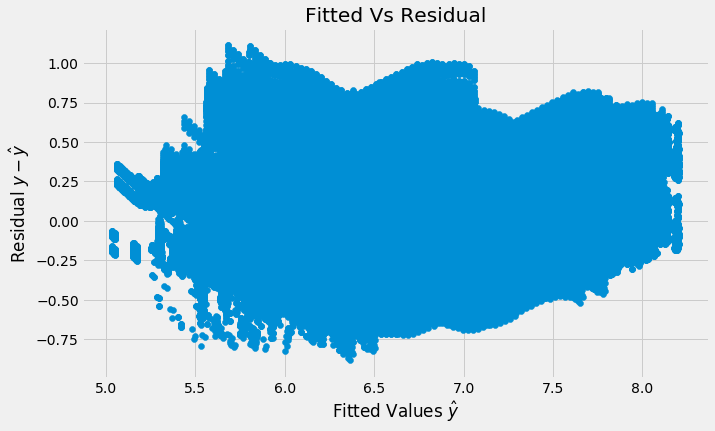

In [65]:
plt.scatter(prediction, residual)
plt.xlabel("Fitted Values $\hat{y}$")
plt.ylabel("Residual $y - \hat{y}$")
plt.title("Fitted Vs Residual")
plt.show()

In [66]:
prediction_test = m.predict(rates_ml_test_pred_dummies)

from sklearn.metrics import mean_absolute_error
print("The absolute error of test data is : ", mean_absolute_error(rates_ml_test_target['IndividualRateTotallog'], prediction_test))

from sklearn.metrics import mean_squared_error
print("The MSE of test data is : ", mean_squared_error(rates_ml_test_target['IndividualRateTotallog'], prediction_test))

from sklearn.metrics import r2_score
print("The out of sample R square is " , r2_score(rates_ml_test_target['IndividualRateTotallog'], prediction_test))

The absolute error of test data is :  0.16668833812436704
The MSE of test data is :  0.04197370604314306
The out of sample R square is  0.8230464174374507


## Linear Regression 

In [68]:
# Create arrays for the features and the response variable
y_train = rates_ml_train_target['IndividualRateTotallog'].values
X_train = rates_ml_train_pred_dummies.values
y_test = rates_ml_test_target['IndividualRateTotallog'].values
X_test = rates_ml_test_pred_dummies.values

from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True)
lr.fit(X_train,y_train)
y_pred_train = lr.predict(X_train)
print("The Mean Absolute error of train data is : ", mean_absolute_error(y_train, y_pred_train))
print("The MSE of train data is : ", mean_squared_error(y_train, y_pred_train))
print("The out of sample R square is " , r2_score(y_train, y_pred_train))


The Mean Absolute error of train data is :  0.15971737783301704
The MSE of train data is :  0.04333001261551595
The out of sample R square is  0.8484877464029137


In [69]:
y_pred_test = lr.predict(X_test)
print("The absolute error of test data is : ", mean_absolute_error(y_test, y_pred_test))
print("The MSE of test data is : ", mean_squared_error(y_test, y_pred_test))
print("The out of sample R square is " , r2_score(y_test, y_pred_test))

# R Square value of .8230 is quite good and same as what we got in OLS

The absolute error of test data is :  0.16669785911262558
The MSE of test data is :  0.04197699997095164
The out of sample R square is  0.8230325308312542


## Decision Tree regression
**Decision Tree** 

I will use DecisionTreeRegressor to predict the IndividualRate and will compare with the Linear model to check if the model improves in predicting the monthly rates.

In [70]:
# import necesaary packages from sklearn for descision tree model
from sklearn import tree

In [71]:
# For predicting continuous target we need to use DecisionTreeRegressor()
# and not DecisionTreeClassifier()
# create regressor and fit the model with training data: dt
dt = tree.DecisionTreeRegressor()
dt = dt.fit(X_train, y_train)

In [72]:
dt_importances = pd.DataFrame(dt.feature_importances_, rates_ml_train_pred_dummies.columns, columns=["Importances"])
print(dt_importances)
print('Score', dt.score(X_train, y_train))

                                       Importances
Age                                       0.549933
BusinessYear                              0.105679
RatingAreaId                              0.020174
Duration                                  0.003733
TEHBInnTier1IndividualMOOP                0.017077
TEHBOutOfNetIndividualMOOP                0.018878
BenefitName                               0.022567
Tobacco_No Preference                     0.105816
Tobacco_Tobacco User/Non-Tobacco User     0.062596
MetalLevel_Bronze                         0.029070
MetalLevel_Catastrophic                   0.001671
MetalLevel_Expanded Bronze                0.007617
MetalLevel_Gold                           0.010883
MetalLevel_Platinum                       0.039771
MetalLevel_Silver                         0.004417
IsEHB_No                                  0.000068
IsEHB_Yes                                 0.000049
Score 0.9778290187539397


This model is approximately **97.8%** accurate, which is better than Linear model but this score is on training data. There could be overfitting as well as it is too accurate. 
We have to check the score on data which is not seen by the model i.e. test data.

**Feature Importance**
From the below graph it is confirmed that Age & Tobacco use are the major factor in deciding the PREMIUM. It is unarguably known fact as well.

                                       Importance
Age                                      0.549933
Tobacco_No Preference                    0.105816
BusinessYear                             0.105679
Tobacco_Tobacco User/Non-Tobacco User    0.062596
MetalLevel_Platinum                      0.039771
MetalLevel_Bronze                        0.029070
BenefitName                              0.022567
RatingAreaId                             0.020174
TEHBOutOfNetIndividualMOOP               0.018878
TEHBInnTier1IndividualMOOP               0.017077
MetalLevel_Gold                          0.010883
MetalLevel_Expanded Bronze               0.007617
MetalLevel_Silver                        0.004417
Duration                                 0.003733
MetalLevel_Catastrophic                  0.001671
IsEHB_No                                 0.000068
IsEHB_Yes                                0.000049


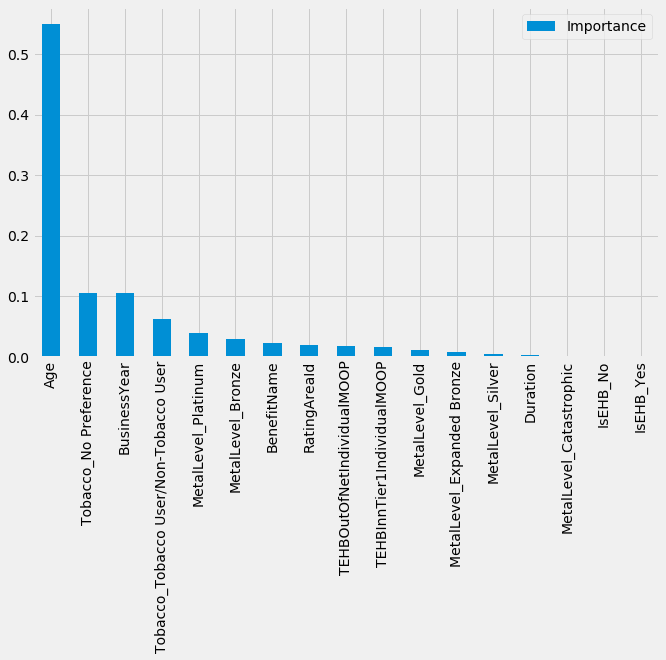

In [73]:
feature_importances = pd.DataFrame(dt.feature_importances_,
                                   index = rates_ml_train_pred_dummies.columns,
                                    columns=['Importance']).sort_values('Importance',ascending=False)
print(feature_importances)

feature_importances.plot.bar( rot=90)

In [54]:
print('Score on test data: ', dt.score(X_test, y_test))

Score on test data:  0.9007578248419158


The score is really good. It is predicting with 90% accuracy on Test dataset as well. The core has significantly improved from the linear regression

**Cross validation & Model Evaluation**

Implement 5 fold cross validation on the training dataset to train the model in much better way for Individual Rate.

In [2]:
# import all the neccessary packages.
from sklearn.model_selection import cross_val_score, train_test_split 
#from sklearn import cross_validation
from sklearn.linear_model import Ridge, LassoCV
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection

In [7]:
X1 = X_train
Y1 = y_train
validation_size = 0.20
seed = 7
scoring = 'r2'
X_train1, X_validation, Y_train1, Y_validation = train_test_split(X1, Y1, test_size=validation_size, random_state=seed)

# Spot Check Algorithms
models = []
models.append(('RD', Ridge()))
models.append(('LCV', LassoCV()))
models.append(('RF', RandomForestRegressor()))
models.append(('GB', GradientBoostingRegressor()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, random_state=seed)
    cv_results = cross_val_score(model, X_train1, Y_train1, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
#    cv_results_rmse = np.sqrt(-cv_results)
   
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    print("Scores:",cv_results)

RD: 0.848540 (0.000409)
Scores: [0.84777365 0.84865597 0.84894855 0.84879888 0.84852119]
LCV: 0.605720 (0.000645)
Scores: [0.60471285 0.60523042 0.60644673 0.60606967 0.60614054]
RF: 0.966360 (0.000115)
Scores: [0.96618091 0.96640628 0.96649473 0.96644124 0.96627753]
GB: 0.923770 (0.000563)
Scores: [0.92435501 0.92346243 0.92448467 0.92353854 0.92300751]


In [81]:
cv_result = pd.read_csv("results.csv")
cv_result

,v1,v2,v3,v4,v5
RD,0.847774,0.848656,0.848949,0.848799,0.848521
LCV,0.604713,0.605230,0.606447,0.606070,0.606141
RF,0.966181,0.966406,0.966495,0.966441,0.966278
GB,0.924355,0.923462,0.924485,0.923539,0.923008


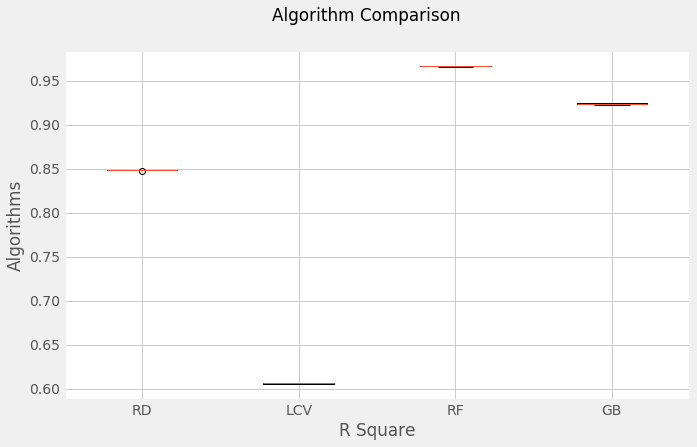

In [87]:
plt.style.use('fivethirtyeight')
rcParams['axes.facecolor'] = 'white'
#Compare Algorithms
fig = plt.figure(figsize=(10, 6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(cv_result)
plt.xlabel('R Square')
plt.ylabel('Algorithms')
ax.set_xticklabels(cv_result.index)
plt.show()

In [84]:
cv_result_avg =cv_result.mean(axis=1)

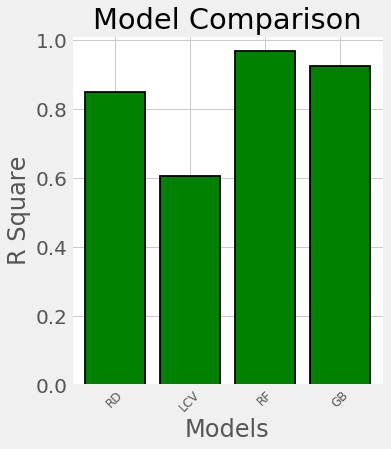

In [85]:
rcParams['figure.figsize'] = 5, 6
rcParams['font.size'] = 20
rcParams['axes.facecolor'] = 'white'
plt.bar(cv_result.index, cv_result_avg, color = 'g', edgecolor = 'k', linewidth = 1.8)
plt.xticks(cv_result.index,  rotation = 45, fontsize = 12)
plt.xlabel('Models'); plt.ylabel('R Square'); plt.title('Model Comparison');

**Machine Learning: Since Random Forest is the clear winner we investigate it further**

# Hyperparameter tuning for Random Forest
**While model parameters are learned during training — such as the slope and intercept in a linear regression — hyperparameters must be set before training.**

**Scikit-Learn implements a set of sensible default hyperparameters for all models, but these are not guaranteed to be optimal for a problem. The best hyperparameters are usually impossible to determine ahead of time, and tuning a model is where machine learning turns from a science into trial-and-error based engineering.**

**Here I will try to get the best parameters for Random Forest estimator before running the test validations on the estimators.**

In [14]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from pprint import pprint

In [3]:
validation_size = 0.4
seed = 7
scoring = 'r2'
X_train1, X_validation, Y_train1, Y_validation = train_test_split(X_train, y_train, test_size=validation_size, random_state=seed)

In [86]:
# By default setup of the hyper parameters by scikit learn
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 7,n_estimators=1)
from pprint import pprint
print('Parameters currently in use:\n')
headers = [ 'Hyperparameter','Value']
base_parameter = pd.DataFrame([ [k,v] for k, v in dict1.items() ],columns=headers)
base_parameter

Parameters currently in use:



,Hyperparameter,Value
0,bootstrap,True
1,criterion,mse
2,max_depth,None
3,max_features,auto
4,max_leaf_nodes,None
5,min_impurity_decrease,0
6,min_impurity_split,None
7,min_samples_leaf,1
8,min_samples_split,2
9,min_weight_fraction_leaf,0


In [4]:
# This function checks the performance of the model
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print("The absolute error of test data is : ", mean_absolute_error(test_labels, predictions))
    print("The MSE of test data is : ", mean_squared_error(test_labels, predictions))
    print("The out of sample R square is " , r2_score(test_labels, predictions))
    return accuracy


In [9]:
%%time
base_model = RandomForestRegressor(random_state = 7,n_estimators=1)
base_model.fit(X_train1, Y_train1)
base_accuracy = evaluate(base_model, X_validation, Y_validation)

Model Performance
Accuracy = 99.08%.
The absolute error of test data is :  0.06346194451940665
The MSE of test data is :  0.011755596538503823
The out of sample R square is  0.9588076584167865
Wall time: 16.9 s


The accuracy of the model is very good. Out of sample R square and MSE is good while using only the Base model and without doing any hyperparameter settings 

# Defination of all hyper-parameters

**n_estimators** = number of trees in the foreset

**max_features** = max number of features considered for splitting a node

**max_depth** = max number of levels in each decision tree

**min_samples_split** = min number of data points placed in a node before the node is split

**min_samples_leaf** = min number of data points allowed in a leaf node

**bootstrap** = method for sampling data points (with or without replacement)

In [15]:
# Lets create the random hyper-parameter grid
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 120, num = 11)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt', 'log2'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [5, 16, 28, 39, 51, 62, 74, 85, 97, 108, 120]}


In [16]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 30 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10,
                               cv = 3, verbose=2, random_state=7, n_jobs = -1,scoring=scoring)
# Fit the random search model
rf_random.fit(X_train1, Y_train1)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 75.2min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': [5, 16, 28, 39, 51, 62, 74, 85, 97, 108, 120], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=7, refit=True,
          return_train_score='warn', scoring='r2', verbose=2)

In [17]:
# Best Parameters searched are:
rf_random.best_params_

{'n_estimators': 120,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': True}

In [18]:
rcv_results = pd.DataFrame.from_dict(rf_random.cv_results_)
rcv_results.to_csv('rcv_results.csv')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\util

In [19]:
rcv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,387.289981,5.228982,40.418320,0.487411,39,5,1,sqrt,30,False,"{'n_estimators': 39, 'min_samples_split': 5, '...",0.962841,0.962635,0.962635,0.962703,0.000097,10,0.981881,0.981888,0.981943,0.981904,0.000028
1,2346.838723,30.814932,102.032220,1.538339,120,10,1,auto,50,True,"{'n_estimators': 120, 'min_samples_split': 10,...",0.970262,0.970229,0.970181,0.970224,0.000033,1,0.979569,0.979593,0.979613,0.979592,0.000018
2,804.418599,59.067339,66.825037,0.837537,108,2,2,log2,20,True,"{'n_estimators': 108, 'min_samples_split': 2, ...",0.965055,0.965140,0.965113,0.965102,0.000035,8,0.970214,0.970403,0.970345,0.970321,0.000079
3,870.340488,49.400715,87.443424,3.766666,108,2,4,sqrt,90,True,"{'n_estimators': 108, 'min_samples_split': 2, ...",0.967240,0.967115,0.967117,0.967158,0.000059,3,0.975816,0.975771,0.975806,0.975798,0.000019
4,474.240679,14.194003,15.568943,0.296176,16,10,2,auto,80,False,"{'n_estimators': 16, 'min_samples_split': 10, ...",0.966246,0.966207,0.966206,0.966220,0.000019,7,0.979600,0.979608,0.979615,0.979608,0.000006
5,779.660479,20.861861,72.564852,2.991364,74,5,2,sqrt,30,False,"{'n_estimators': 74, 'min_samples_split': 5, '...",0.964242,0.964196,0.964008,0.964149,0.000101,9,0.981015,0.981007,0.981035,0.981019,0.000011
6,1551.321978,51.963743,59.862277,5.504297,74,10,1,auto,40,True,"{'n_estimators': 74, 'min_samples_split': 10, ...",0.970215,0.970198,0.970134,0.970183,0.000035,2,0.979534,0.979555,0.979580,0.979556,0.000019
7,1438.574732,14.588752,43.262004,6.250902,51,10,4,auto,80,False,"{'n_estimators': 51, 'min_samples_split': 10, ...",0.966793,0.966683,0.966717,0.966731,0.000046,5,0.978578,0.978603,0.978612,0.978598,0.000015
8,745.025863,135.857631,67.168807,15.739728,97,5,4,sqrt,50,True,"{'n_estimators': 97, 'min_samples_split': 5, '...",0.967187,0.967206,0.966993,0.967129,0.000096,4,0.975767,0.975869,0.975792,0.975809,0.000043
9,126.291323,8.909336,12.117963,1.262432,16,10,4,log2,110,True,"{'n_estimators': 16, 'min_samples_split': 10, ...",0.966718,0.966402,0.966494,0.966538,0.000133,6,0.975010,0.974854,0.975029,0.974964,0.000079


In [21]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_validation, Y_validation)

Model Performance
Accuracy = 99.14%.
The absolute error of test data is :  0.05910903752818547
The MSE of test data is :  0.00838429031579245
The out of sample R square is  0.9706209251491623


In [22]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.06%.


**Grid Search with Cross Validation**

Random search allowed us to narrow down the range for each hyperparameter. Now that we know where to concentrate our search, we can explicitly specify every combination of settings to try. We do this with GridSearchCV, a method that, instead of sampling randomly from a distribution, evaluates all combinations we define. To use Grid Search, we make another grid based on the best values provided by random search

In [24]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [30, 50],
    'min_samples_leaf': [1],
    'max_features': ['auto'],
    'min_samples_split': [8, 10],
    'n_estimators': [100, 120, 150]
}
# Create a based model
rf = RandomForestRegressor(random_state=7)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2,scoring =scoring )

In [25]:
# Fit the grid search to the data
grid_search.fit(X_train1, Y_train1)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 252.5min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=7, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_depth': [30, 50], 'min_samples_leaf': [1], 'max_features': ['auto'], 'min_samples_split': [8, 10], 'n_estimators': [100, 120, 150]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=2)

In [26]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 150}

In [27]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_validation, Y_validation)

Model Performance
Accuracy = 99.14%.
The absolute error of test data is :  0.05917777329224039
The MSE of test data is :  0.008342142802806757
The out of sample R square is  0.9707686126566489


In [28]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.06%.


In [29]:
gcv_results = pd.DataFrame.from_dict(grid_search.cv_results_)
gcv_results.to_csv('gcv_results.csv')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\util

In [30]:
gcv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,2010.430445,44.259367,88.300408,0.923198,True,30,auto,1,8,100,"{'bootstrap': True, 'max_depth': 30, 'max_feat...",0.969867,0.969820,0.969764,0.969817,0.000042,9,0.980010,0.980035,0.980055,0.980033,0.000018
1,2356.688211,29.271383,105.000645,1.976883,True,30,auto,1,8,120,"{'bootstrap': True, 'max_depth': 30, 'max_feat...",0.969880,0.969833,0.969779,0.969831,0.000041,8,0.980022,0.980046,0.980064,0.980044,0.000017
2,3067.834925,115.653370,129.374582,6.943837,True,30,auto,1,8,150,"{'bootstrap': True, 'max_depth': 30, 'max_feat...",0.969893,0.969856,0.969791,0.969847,0.000042,7,0.980033,0.980057,0.980074,0.980055,0.000017
3,2194.021427,50.367780,83.188370,2.118241,True,30,auto,1,10,100,"{'bootstrap': True, 'max_depth': 30, 'max_feat...",0.970340,0.970302,0.970250,0.970297,0.000037,3,0.979350,0.979380,0.979399,0.979377,0.000020
4,2688.756166,91.146324,85.505878,10.300649,True,30,auto,1,10,120,"{'bootstrap': True, 'max_depth': 30, 'max_feat...",0.970354,0.970312,0.970263,0.970309,0.000037,2,0.979361,0.979390,0.979408,0.979386,0.000020


In [31]:
# Create the parameter grid based on the results of grid search and random search again 
param_grid1 = {
    'bootstrap': [True],
    'max_depth': [30],
    'min_samples_leaf': [1],
    'max_features': ['auto'],
    'min_samples_split': [10],
    'n_estimators': [1,3,5,10,20,50,100,120,150,300,400,500]
}
# Create a based model
rf = RandomForestRegressor(random_state=7)
# Instantiate the grid search model
grid_search1 = GridSearchCV(estimator = rf, param_grid = param_grid1, 
                          cv = 3, n_jobs = -1, verbose = 2,scoring =scoring )

In [32]:
# Fit the grid search to the data
grid_search1.fit(X_train1, Y_train1)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 309.4min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_depth': [30], 'min_samples_leaf': [1], 'max_features': ['auto'], 'min_samples_split': [10], 'n_estimators': [1, 3, 5, 10, 20, 50, 100, 120, 150, 300, 400, 500]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=2)

In [33]:
grid_search1.best_params_

{'bootstrap': True,
 'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 500}

In [34]:
best_grid1 = grid_search1.best_estimator_
grid_accuracy1 = evaluate(best_grid1, X_validation, Y_validation)

Model Performance
Accuracy = 99.14%.
The absolute error of test data is :  0.059145725783166
The MSE of test data is :  0.008332583024021388
The out of sample R square is  0.970802110716224
Improvement of -0.00%.


In [42]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy1 - base_accuracy) / base_accuracy))

Improvement of 0.06%.


In [43]:
gcv_results1 = pd.DataFrame.from_dict(grid_search1.cv_results_)
gcv_results1.to_csv('gcv_results1.csv')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\util

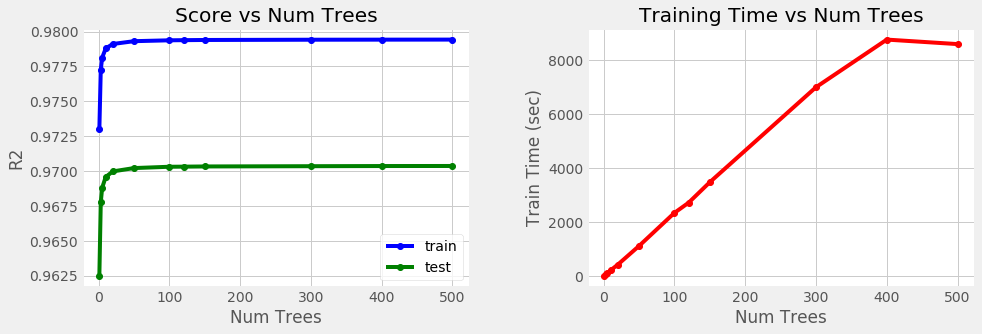

In [99]:
def plot_results(model, param = 'n_estimators', name = 'Num Trees'):
    param_name = 'param_%s' % param

    # Extract information from the cross validation model
    train_scores = model.cv_results_['mean_train_score']
    test_scores = model.cv_results_['mean_test_score']
    train_time = model.cv_results_['mean_fit_time']
    param_values = list(model.cv_results_[param_name])
    
    # Plot the scores over the parameter
    plt.subplots(1, 2, figsize=(15, 6))
    plt.subplot(121)
    plt.plot(param_values, train_scores, 'bo-', label = 'train')
    plt.plot(param_values, test_scores, 'go-', label = 'test')
    plt.legend()
    plt.xlabel(name)
    plt.ylabel('R2')
    plt.title('Score vs %s' % name)
    
    plt.subplot(122)
    plt.plot(param_values, train_time, 'ro-')
    plt.xlabel(name)
    plt.ylabel('Train Time (sec)')
    plt.title('Training Time vs %s' % name)   
    plt.tight_layout(pad = 4)
    
plot_results(grid_search1)

# Evaluation of all Models on Hold Out Dataset

In [53]:
def evaluate1(model, test_features, test_labels,algo,test_type='train'):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    r2 = r2_score(test_labels, predictions)
    mae = mean_absolute_error(test_labels, predictions)
    mse = mean_squared_error(test_labels, predictions)
    print('Model Performance on ' , test_type)
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print("The absolute error of ", test_type, " data is : ", mae)
    print("The MSE of " ,test_type, " data is : ", mse)
    print("The out of sample R square of " ,test_type, " data is " , r2)
    scores = [algo,r2,mae,mse,accuracy]
    return scores 

In [56]:
columns=['ALG','R2','MAE','MSE','Accuracy']
score_test= pd.DataFrame(columns=columns)
estimators = {'OLS': m, 'Lin Reg' : lr,'base_model':base_model,'RandomCV':best_random,'GridCV1':best_grid,'GridCV2':best_grid}

for Algo , estimator in estimators.items():
    score_test.loc[len(score_test)] = evaluate1(estimator, X_test, y_test,Algo,test_type='train')

Model Performance on  train
Accuracy = 97.69%.
The absolute error of  train  data is :  0.16668833812437642
The MSE of  train  data is :  0.041973706043149143
The out of sample R square of  train  data is  0.823046417437425
Model Performance on  train
Accuracy = 97.69%.
The absolute error of  train  data is :  0.16669682318184897
The MSE of  train  data is :  0.041976355888213
The out of sample R square of  train  data is  0.8230352461680402
Model Performance on  train
Accuracy = 98.24%.
The absolute error of  train  data is :  0.12652926664219816
The MSE of  train  data is :  0.030455833727324255
The out of sample R square of  train  data is  0.8716036920247181
Model Performance on  train
Accuracy = 98.33%.
The absolute error of  train  data is :  0.11990484926408404
The MSE of  train  data is :  0.023818224583339657
The out of sample R square of  train  data is  0.8995866563231467
Model Performance on  train
Accuracy = 98.33%.
The absolute error of  train  data is :  0.11992865493657

In [57]:
score_test

,ALG,R2,MAE,MSE,Accuracy
0,OLS,0.823046,0.166688,0.041974,97.692620
1,Lin Reg,0.823035,0.166697,0.041976,97.692543
2,base_model,0.871604,0.126529,0.030456,98.236963
3,RandomCV,0.899587,0.119905,0.023818,98.328908
4,GridCV1,0.899701,0.119929,0.023791,98.328548
5,GridCV2,0.899701,0.119929,0.023791,98.328548


Text(0.5, 1.0, 'Accuracy Vs Algorithm')

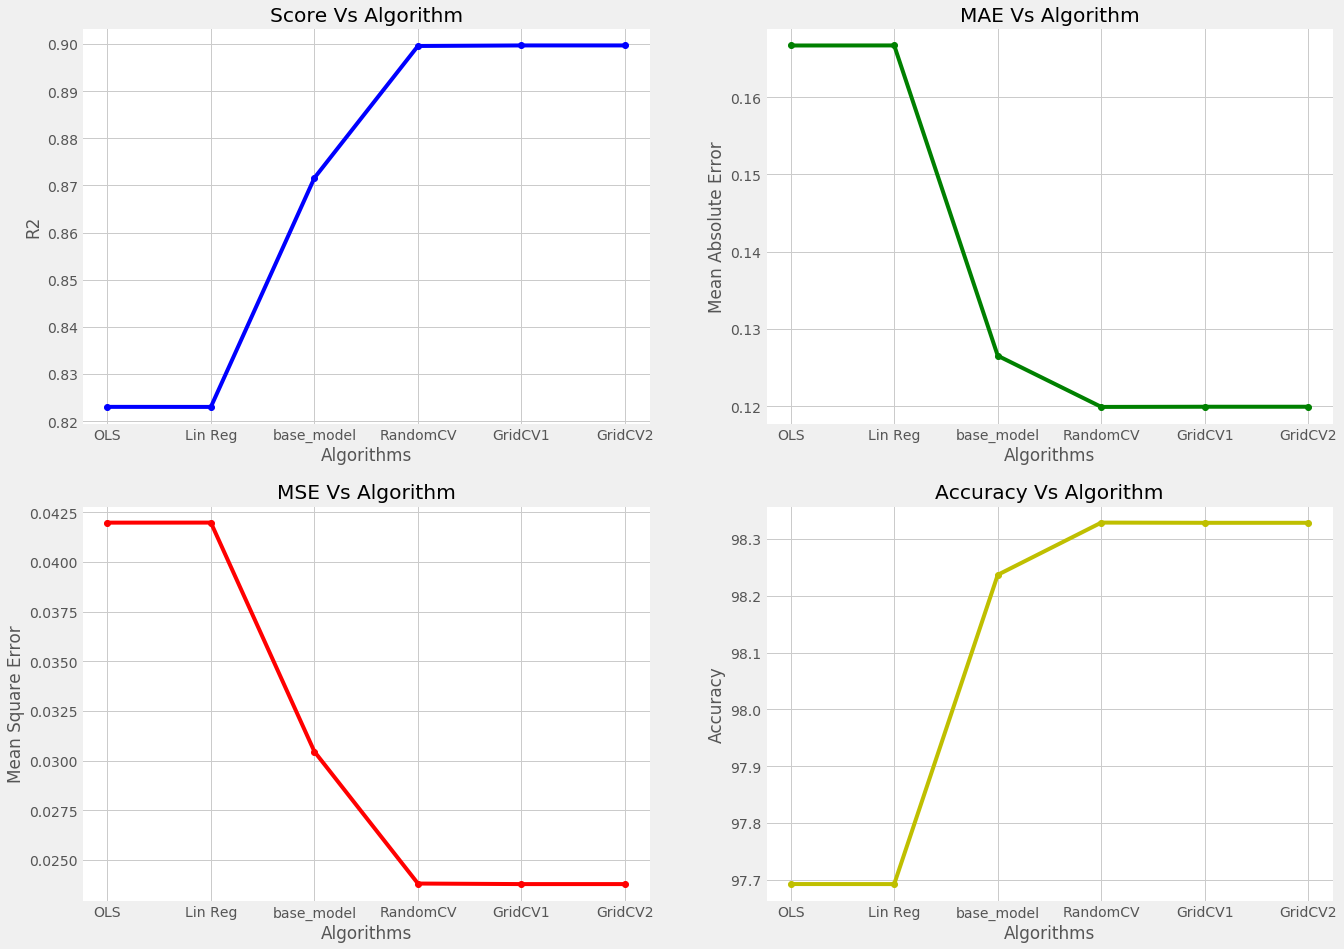

In [119]:
# Plot the scores over the Algorithm
plt.subplots(2, 2, figsize=(20, 15))
plt.subplot(221)
plt.plot(score_test['ALG'], score_test['R2'], 'bo-')
plt.ylabel('R2')
plt.xlabel('Algorithms')
plt.title('Score Vs Algorithm')
    
plt.subplot(222)
plt.plot(score_test['ALG'], score_test['MAE'], 'go-')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Algorithms')
plt.title('MAE Vs Algorithm')

plt.subplot(223)
plt.plot(score_test['ALG'], score_test['MSE'], 'ro-')
plt.ylabel('Mean Square Error')
plt.xlabel('Algorithms')
plt.title('MSE Vs Algorithm')

plt.subplot(224)
plt.plot(score_test['ALG'], score_test['Accuracy'], 'yo-')
plt.ylabel('Accuracy')
plt.xlabel('Algorithms')
plt.title('Accuracy Vs Algorithm')

